<a href="https://colab.research.google.com/github/GitOlivier10/titanic-ml-project/blob/main/titanic_olivier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [57]:
# 1. IMPORTATIONS & CONFIG
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Options d'affichage
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")

# Pour ignorer les warnings
import warnings
warnings.filterwarnings('ignore')


In [58]:
df_gender = pd.read_csv('https://raw.githubusercontent.com/GitOlivier10/titanic-ml-project/6f6c9c5669cef524d2f04662c8a45ce016287ad6/gender_submission.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/GitOlivier10/titanic-ml-project/6f6c9c5669cef524d2f04662c8a45ce016287ad6/test.csv')
df_train = pd.read_csv('https://raw.githubusercontent.com/GitOlivier10/titanic-ml-project/6f6c9c5669cef524d2f04662c8a45ce016287ad6/train.csv')

In [59]:
display(df_gender.head())
display(df_test.head())
display(df_train.head())

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [60]:
print(len(df_gender))
print(len(df_test))
print(len(df_train))

418
418
891


In [61]:
df_test_gender = pd.merge(df_test, df_gender, on='PassengerId')
display(df_test_gender.head())

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1


In [62]:
print(df_test_gender['Sex'].value_counts())
print(df_test_gender['Survived'].value_counts())
print(df_test_gender.groupby('Survived')['Sex'].value_counts())

Sex
male      266
female    152
Name: count, dtype: int64
Survived
0    266
1    152
Name: count, dtype: int64
Survived  Sex   
0         male      266
1         female    152
Name: count, dtype: int64


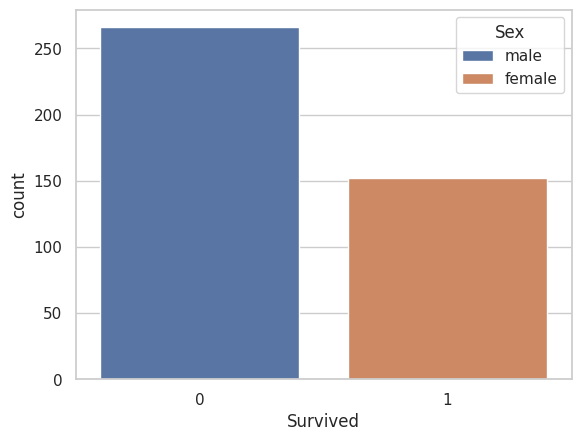

In [63]:
sns.countplot(x='Survived', hue='Sex', data=df_test_gender)
plt.show()

# **df_train exploration**

In [64]:
display(df_train.head())
df_train.info()
df_train.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Dooley, Mr. Patrick",male,NaN,NaN,NaN,347082,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


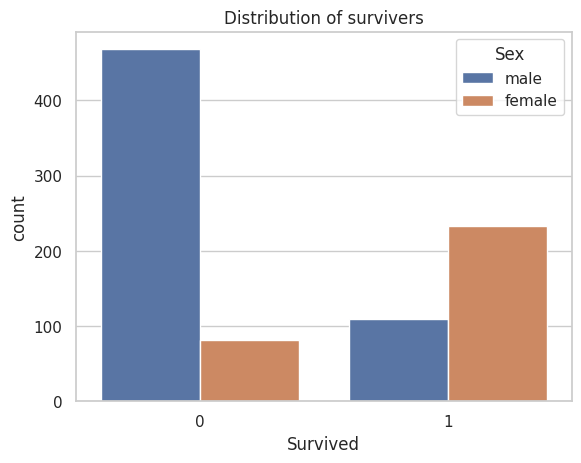

In [65]:
sns.countplot(x='Survived', hue='Sex', data=df_train)
plt.title("Distribution of survivers")
plt.show()

In [66]:
survival_rate = df_train['Survived'].value_counts(normalize=True) * 100
print(survival_rate)

Survived
0    61.616162
1    38.383838
Name: proportion, dtype: float64


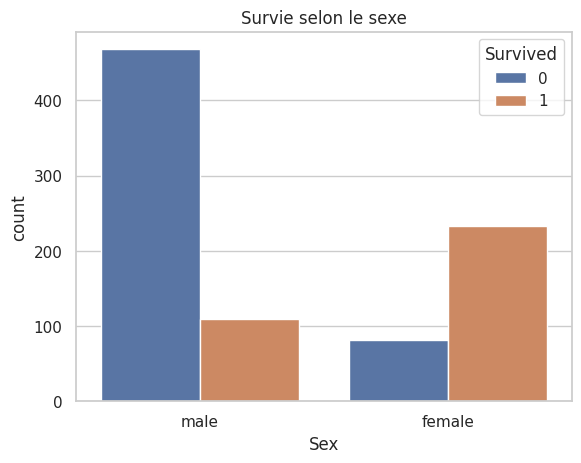

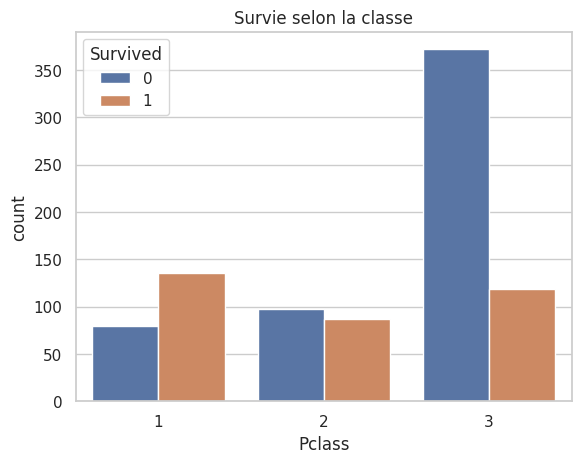

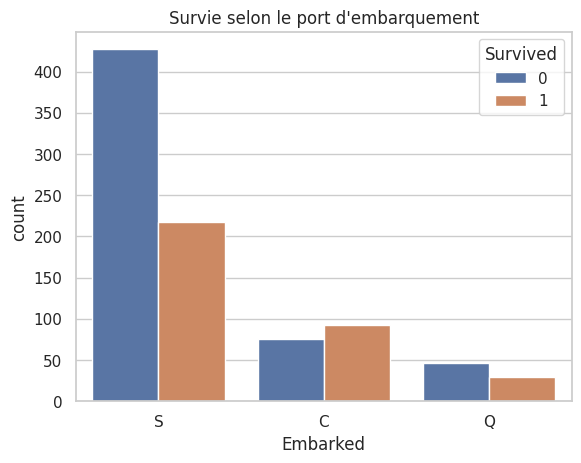

In [67]:
# Sex
sns.countplot(x='Sex', hue='Survived', data=df_train)
plt.title("Survie selon le sexe")
plt.show()

# Class
sns.countplot(x='Pclass', hue='Survived', data=df_train)
plt.title("Survie selon la classe")
plt.show()

# Port
sns.countplot(x='Embarked', hue='Survived', data=df_train)
plt.title("Survie selon le port d'embarquement")
plt.show()


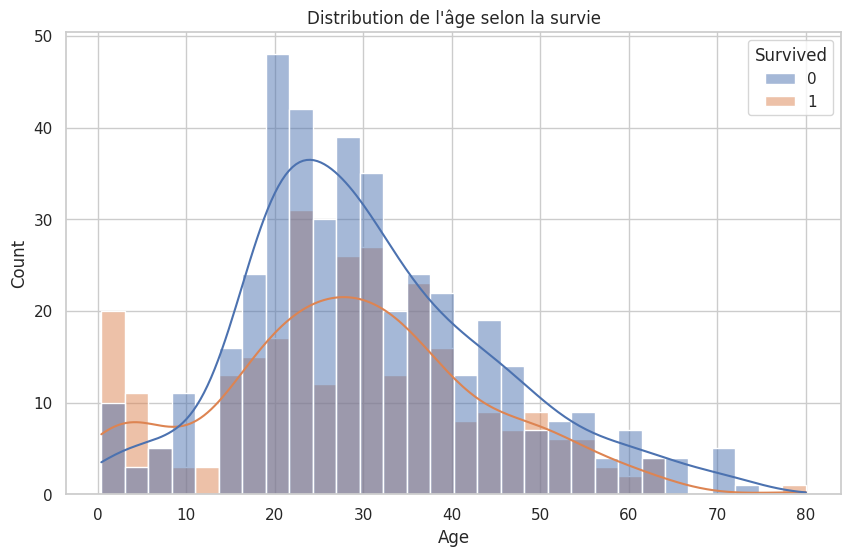

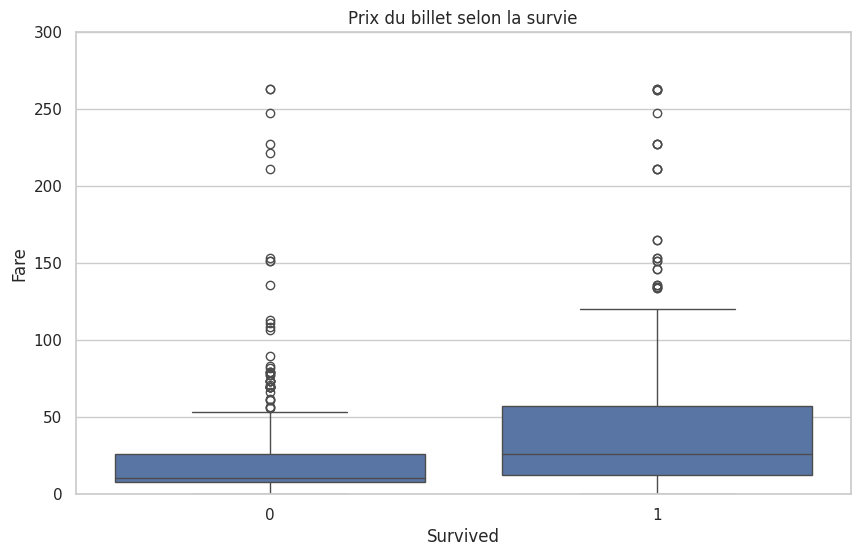

In [68]:
# Âge
plt.figure(figsize=(10, 6))
sns.histplot(data=df_train, x='Age', hue='Survived', kde=True, bins=30)
plt.title("Distribution de l'âge selon la survie")
plt.show()

# Prix du billet
plt.figure(figsize=(10, 6))
sns.boxplot(x='Survived', y='Fare', data=df_train)
plt.title("Prix du billet selon la survie")
plt.ylim(0, 300)
plt.show()


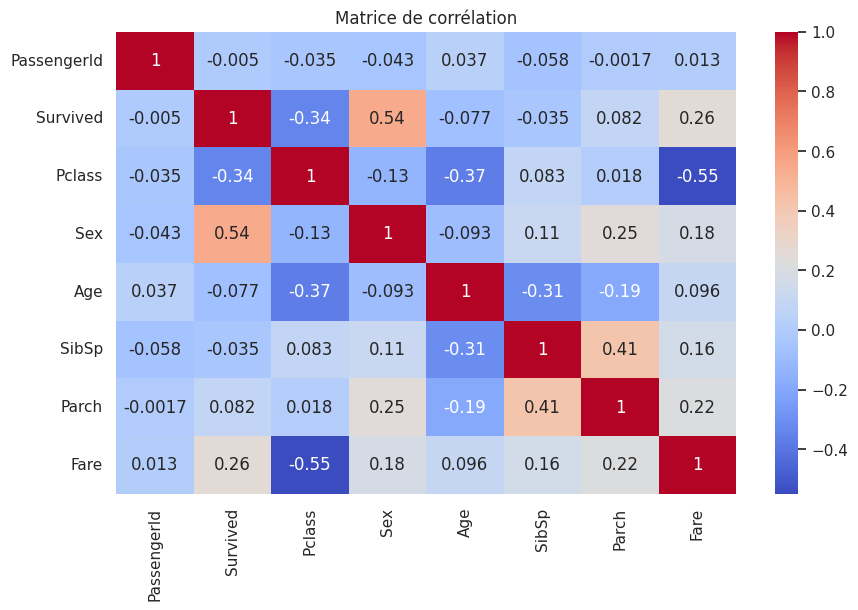

In [69]:
# Sélectionner seulement les colonnes numériques
df_corr = df_train.copy()
df_corr['Sex'] = df_corr['Sex'].map({'male': 0, 'female': 1})

numeric_cols = df_corr.select_dtypes(include=['number'])

# Heatmap des corrélations
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm')
plt.title("Matrice de corrélation")
plt.show()



In [70]:
print(df_train.dtypes)


PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


# **Nettoyage de df_train**

In [71]:
df_train['Age'].fillna(df_train['Age'].median(), inplace=True)
df_train['Embarked'].fillna(df_train['Embarked'].mode()[0], inplace=True)
df_train.drop(columns=['Cabin'], inplace=True)

df_train['Sex'] = df_train['Sex'].map({'male': 0, 'female': 1})
df_train = pd.get_dummies(df_train, columns=['Embarked'], drop_first=True)

df_train.drop(columns=['Name', 'Ticket', 'PassengerId'], inplace=True)
display(df_train)


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,0,3,0,22.0,1,0,7.2500,False,True
1,1,1,1,38.0,1,0,71.2833,False,False
2,1,3,1,26.0,0,0,7.9250,False,True
3,1,1,1,35.0,1,0,53.1000,False,True
4,0,3,0,35.0,0,0,8.0500,False,True
...,...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,13.0000,False,True
887,1,1,1,19.0,0,0,30.0000,False,True
888,0,3,1,28.0,1,2,23.4500,False,True
889,1,1,0,26.0,0,0,30.0000,False,False


# **Étape 2 : Appliquer le même traitement à df_test**

In [72]:
df_test['Age'].fillna(df_test['Age'].median(), inplace=True)
df_test['Fare'].fillna(df_test['Fare'].median(), inplace=True)  # il y a une valeur manquante ici
df_test.drop(columns=['Cabin'], inplace=True)

df_test['Sex'] = df_test['Sex'].map({'male': 0, 'female': 1})
df_test = pd.get_dummies(df_test, columns=['Embarked'], drop_first=True)

df_test.drop(columns=['Name', 'Ticket'], inplace=True)
display(df_test)


,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,892,3,0,34.5,0,0,7.8292,True,False
1,893,3,1,47.0,1,0,7.0000,False,True
2,894,2,0,62.0,0,0,9.6875,True,False
3,895,3,0,27.0,0,0,8.6625,False,True
4,896,3,1,22.0,1,1,12.2875,False,True
...,...,...,...,...,...,...,...,...,...
413,1305,3,0,27.0,0,0,8.0500,False,True
414,1306,1,1,39.0,0,0,108.9000,False,False
415,1307,3,0,38.5,0,0,7.2500,False,True
416,1308,3,0,27.0,0,0,8.0500,False,True
